In [1]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name, lable_in_last):
    path = os.path.join("data", name)
    data = pd.read_csv(path)
    data = data.values
    if lable_in_last:
        xs = data[:, :-1].astype('float32')
        ys = data[:, -1]
    else:
        xs = data[:, 1:].astype('float32')
        ys = data[:, 0]
    return xs, ys

In [3]:
dataset_spam = load_dataset("spam.csv", True)
dataset_cancer = load_dataset("cancer.csv", False)

In [4]:
def calculate_roc_auc(xs, ys, dataset_name, pos_label):
    n = xs.shape[0]
    m = xs.shape[1]
    
    auc_score = [roc_auc_score(ys, xs[:, i]) for i in range(m)]
    auc_score = np.array(auc_score)
    
    print("For dataset '{}', AUC scores:".format(dataset_name))
    print(auc_score)

    indxs = np.argsort(auc_score)[-3:]
    for i in indxs:
        fpr, tpr, _ = roc_curve(ys, xs[:, i], pos_label=pos_label)
        
        plt.plot(fpr, tpr)
        plt.title("dataset '{}', ROC num {}".format(dataset_name, i))
        plt.show()

For dataset 'spam', AUC scores:
[0.60463239 0.62160144 0.67531423 0.50934022 0.71093246 0.6357693
 0.70313033 0.6357601  0.61569875 0.63933385 0.63174785 0.58223467
 0.58520254 0.54104483 0.57065997 0.73272846 0.64825287 0.62931366
 0.71046814 0.59609717 0.78016592 0.52222788 0.65518966 0.67789759
 0.32393528 0.36586494 0.36333212 0.43024128 0.43836777 0.42375378
 0.4488233  0.4641313  0.45425543 0.46585882 0.43257676 0.44237843
 0.39679788 0.49965606 0.45828519 0.50859151 0.47390004 0.44748067
 0.46977938 0.46196448 0.46623096 0.43617918 0.49730456 0.4707748
 0.47793841 0.48139582 0.46360476 0.82904612 0.77213944 0.60132771
 0.78820042 0.80416257 0.76228009]


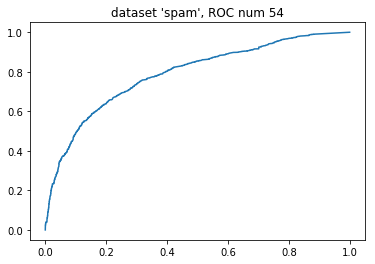

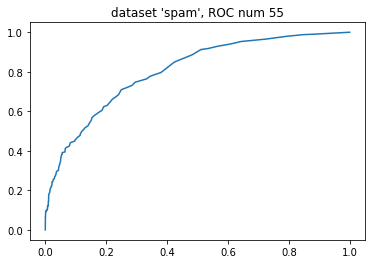

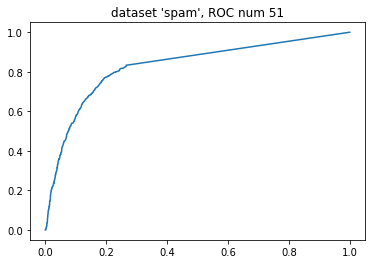

In [5]:
calculate_roc_auc(dataset_spam[0], dataset_spam[1], "spam", 1)

For dataset 'cancer', AUC scores:
[0.93751652 0.77582448 0.94689763 0.93831589 0.72204165 0.86378231
 0.93782702 0.96443766 0.69856244 0.48453438 0.86833413 0.51159426
 0.87639395 0.92641113 0.46883754 0.72728053 0.78081893 0.79179219
 0.44488928 0.62030284 0.97044289 0.78463083 0.97545056 0.9698285
 0.75405634 0.86230247 0.92136383 0.96670366 0.73693912 0.68597061]


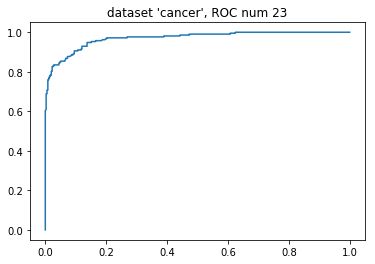

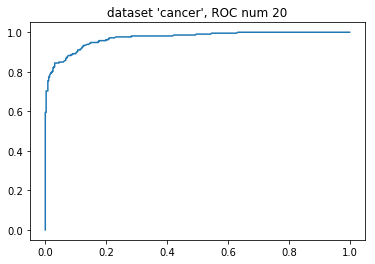

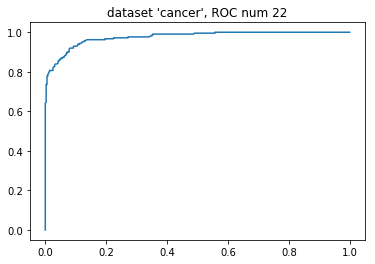

In [6]:
calculate_roc_auc(dataset_cancer[0], dataset_cancer[1], "cancer", 'M')